In [1]:
## Create Latitude and Longitude Combos


In [93]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import o_weather
import requests
import gmaps
from scipy.stats import linregress
import os

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
#when importing from a file thats py already don't need as py
from citipy import citipy

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + o_weather

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# WARNING zipped tuple cann only be unziiped once before remvoed from computer's memory

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters./ want the 1st iteration of the logging for each recorded response
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
#### Generate Random World Cities

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [12]:
##Loop through Cities and Build City URL

In [13]:
#for i, item in enumerate(list):
#syntax for method

In [14]:
#used enumerate to loop while keeping track of the index vaules in a seprate var

In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | cuyamel
Processing Record 3 of Set 1 | hasaki
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | kikwit
Processing Record 8 of Set 1 | mehamn
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | marsh harbour
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | amderma
City not found. Skipping...
Processing Record 14 of Set 1 | rio grande
Processing Record 15 of Set 1 | manggar
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | bonthe
Processing Record 18 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | de-kastri
Processing Record 22 of Set 1 | atuona
Processing Record

Processing Record 41 of Set 4 | burdur
Processing Record 42 of Set 4 | zolotyy potik
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | ekhabi
Processing Record 45 of Set 4 | khonuu
City not found. Skipping...
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | lubbock
Processing Record 49 of Set 4 | baikunthpur
Processing Record 50 of Set 4 | mount isa
Processing Record 1 of Set 5 | atka
City not found. Skipping...
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | pochutla
Processing Record 4 of Set 5 | veraval
Processing Record 5 of Set 5 | mandello del lario
Processing Record 6 of Set 5 | daru
Processing Record 7 of Set 5 | plattsburgh
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | ngunguru
Processing Record 10 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 11 of Set 5 | adre
Processing Record 12 of Set 5 | mahebourg
Processin

Processing Record 29 of Set 8 | walvis bay
Processing Record 30 of Set 8 | banjar
Processing Record 31 of Set 8 | albion
Processing Record 32 of Set 8 | kaeng khoi
Processing Record 33 of Set 8 | kalangala
Processing Record 34 of Set 8 | egvekinot
Processing Record 35 of Set 8 | lompoc
Processing Record 36 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 37 of Set 8 | kurilsk
Processing Record 38 of Set 8 | sabang
Processing Record 39 of Set 8 | bocas del toro
Processing Record 40 of Set 8 | vargem alta
Processing Record 41 of Set 8 | sidi ali
Processing Record 42 of Set 8 | turayf
Processing Record 43 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 8 | kitama
Processing Record 45 of Set 8 | kokopo
Processing Record 46 of Set 8 | kamenka
Processing Record 47 of Set 8 | dukat
Processing Record 48 of Set 8 | simplicio mendes
Processing Record 49 of Set 8 | krasnoslobodsk
Processing Record 50 of Set 8 | strezhevoy
Processing Record 1 of S

Processing Record 13 of Set 12 | bokspits
City not found. Skipping...
Processing Record 14 of Set 12 | fort saint james
Processing Record 15 of Set 12 | khandyga
Processing Record 16 of Set 12 | mayya
Processing Record 17 of Set 12 | freeport
Processing Record 18 of Set 12 | kiruna
Processing Record 19 of Set 12 | camana
Processing Record 20 of Set 12 | mutoko
Processing Record 21 of Set 12 | berlevag
Processing Record 22 of Set 12 | atikokan
Processing Record 23 of Set 12 | itacarambi
Processing Record 24 of Set 12 | pangnirtung
Processing Record 25 of Set 12 | fairbanks
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | noumea
Processing Record 28 of Set 12 | la tuque
Processing Record 29 of Set 12 | alexandria
Processing Record 30 of Set 12 | the valley
Processing Record 31 of Set 12 | araouane
Processing Record 32 of Set 12 | virginia beach
Processing Record 33 of Set 12 | shenjiamen
Processing Record 34 of Set 12 | avera
Processing Record 35 of Set 12 | palabuh

In [16]:
len(city_data)
city_data

[{'City': 'Lorengau',
  'Lat': -2.0226,
  'Lng': 147.2712,
  'Max Temp': 83.12,
  'Humidity': 75,
  'Cloudiness': 82,
  'Wind Speed': 6.73,
  'Country': 'PG',
  'Date': '2021-09-25 22:14:25'},
 {'City': 'Cuyamel',
  'Lat': 15.6667,
  'Lng': -88.2,
  'Max Temp': 89.76,
  'Humidity': 74,
  'Cloudiness': 67,
  'Wind Speed': 4.36,
  'Country': 'HN',
  'Date': '2021-09-25 22:16:13'},
 {'City': 'Hasaki',
  'Lat': 35.7333,
  'Lng': 140.8333,
  'Max Temp': 68.4,
  'Humidity': 60,
  'Cloudiness': 100,
  'Wind Speed': 14.52,
  'Country': 'JP',
  'Date': '2021-09-25 22:16:13'},
 {'City': 'Punta Arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 42.91,
  'Humidity': 65,
  'Cloudiness': 40,
  'Wind Speed': 18.41,
  'Country': 'CL',
  'Date': '2021-09-25 22:16:13'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 69.53,
  'Humidity': 71,
  'Cloudiness': 93,
  'Wind Speed': 2.82,
  'Country': 'US',
  'Date': '2021-09-25 22:11:49'},
 {'City': 'Butaritari',
  'Lat': 3.070

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,83.12,75,82,6.73,PG,2021-09-25 22:14:25
1,Cuyamel,15.6667,-88.2000,89.76,74,67,4.36,HN,2021-09-25 22:16:13
2,Hasaki,35.7333,140.8333,68.40,60,100,14.52,JP,2021-09-25 22:16:13
3,Punta Arenas,-53.1500,-70.9167,42.91,65,40,18.41,CL,2021-09-25 22:16:13
4,Albany,42.6001,-73.9662,69.53,71,93,2.82,US,2021-09-25 22:11:49
5,Butaritari,3.0707,172.7902,82.98,75,50,10.51,KI,2021-09-25 22:13:29
6,Kikwit,-5.0410,18.8162,77.20,65,74,3.02,CD,2021-09-25 22:16:14
7,Mehamn,71.0357,27.8492,45.75,87,100,8.63,NO,2021-09-25 22:16:15
8,Chokurdakh,70.6333,147.9167,32.67,98,100,10.96,RU,2021-09-25 22:16:15
9,Busselton,-33.6500,115.3333,51.08,90,67,4.21,AU,2021-09-25 22:13:21


In [18]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed" ]


In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Lorengau,82,PG,2021-09-25 22:14:25,75,-2.0226,147.2712,83.12,6.73
1,Cuyamel,67,HN,2021-09-25 22:16:13,74,15.6667,-88.2000,89.76,4.36
2,Hasaki,100,JP,2021-09-25 22:16:13,60,35.7333,140.8333,68.40,14.52
3,Punta Arenas,40,CL,2021-09-25 22:16:13,65,-53.1500,-70.9167,42.91,18.41
4,Albany,93,US,2021-09-25 22:11:49,71,42.6001,-73.9662,69.53,2.82
...,...,...,...,...,...,...,...,...,...
547,Kampong Cham,100,KH,2021-09-25 22:19:24,97,11.9934,105.4635,74.97,5.12
548,Eggenfelden,22,DE,2021-09-25 22:19:25,94,48.4054,12.7626,61.79,2.33
549,Alice Springs,3,AU,2021-09-25 22:16:50,29,-23.7000,133.8833,60.35,6.91
550,Grand-Lahou,100,CI,2021-09-25 22:19:25,91,5.1367,-5.0242,76.39,11.21


In [20]:
# For Below
#The last line in the code block will export the DataFrame to a CSV file, 
#with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame,
#that header will be present in the DataFrame.

In [21]:
# Create the output file (CSV).// unhash when iteration is correct!
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
#can add files to gitignore interesting

In [23]:
## Plotting Lat VS TEMP

In [24]:
# Extract relevant fields from the DataFrame for plotting./// retieving the data is the first step
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

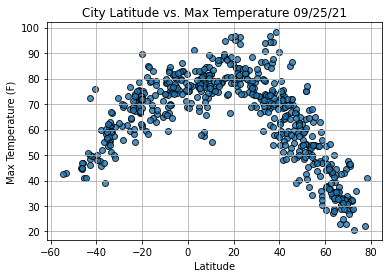

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

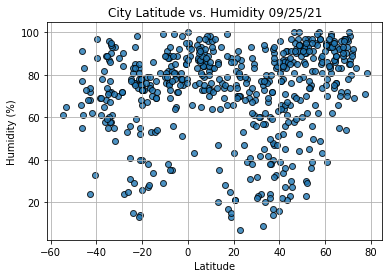

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

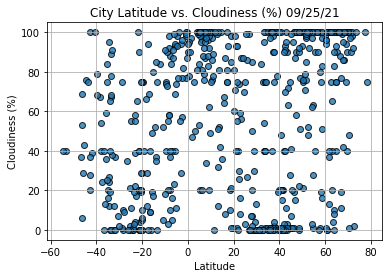

In [27]:
# Build the scatter plots for latitude vs. cloudiness. 6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

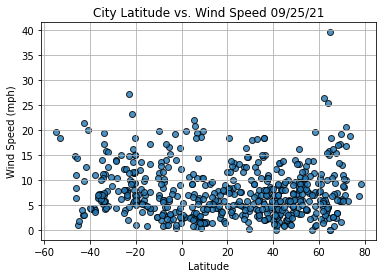

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
## Regresssions 6.4.2

In [30]:
### Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 
### Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable

### A correlation coefficient close to 1 shows a strong positive correlation, 
### whereas close to –1 shows a strong negative correlation. 
###bA correlation coefficient close to zero is no correlation.

In [31]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.///// format to use below
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
## Dataframes

In [33]:
#doing a regress analysis on max temps in n+s hemispheres
#1st create df from citydata_df

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Cuyamel,67,HN,2021-09-25 22:16:13,74,15.6667,-88.2000,89.76,4.36
2,Hasaki,100,JP,2021-09-25 22:16:13,60,35.7333,140.8333,68.40,14.52
4,Albany,93,US,2021-09-25 22:11:49,71,42.6001,-73.9662,69.53,2.82
5,Butaritari,50,KI,2021-09-25 22:13:29,75,3.0707,172.7902,82.98,10.51
7,Mehamn,100,NO,2021-09-25 22:16:15,87,71.0357,27.8492,45.75,8.63
...,...,...,...,...,...,...,...,...,...
544,Shrewsbury,100,GB,2021-09-25 22:19:23,91,52.7101,-2.7521,64.38,4.94
547,Kampong Cham,100,KH,2021-09-25 22:19:24,97,11.9934,105.4635,74.97,5.12
548,Eggenfelden,22,DE,2021-09-25 22:19:25,94,48.4054,12.7626,61.79,2.33
550,Grand-Lahou,100,CI,2021-09-25 22:19:25,91,5.1367,-5.0242,76.39,11.21


In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Cuyamel,67,HN,2021-09-25 22:16:13,74,15.6667,-88.2000,89.76,4.36
2,Hasaki,100,JP,2021-09-25 22:16:13,60,35.7333,140.8333,68.40,14.52
4,Albany,93,US,2021-09-25 22:11:49,71,42.6001,-73.9662,69.53,2.82
5,Butaritari,50,KI,2021-09-25 22:13:29,75,3.0707,172.7902,82.98,10.51
7,Mehamn,100,NO,2021-09-25 22:16:15,87,71.0357,27.8492,45.75,8.63


In [36]:
# Create Northern and Southern Hemisphere DataFrames.// assigning to df to perform lin reg
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

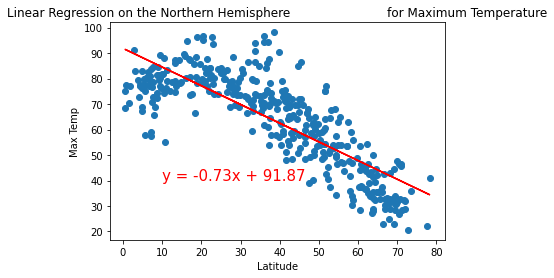

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

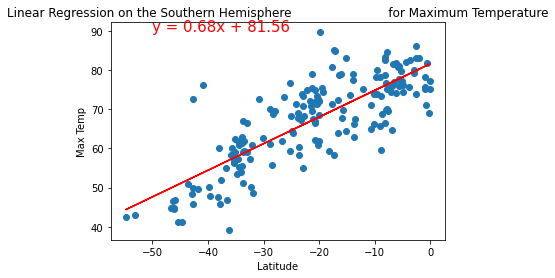

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

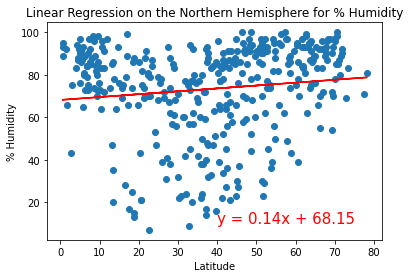

In [39]:
# Linear regression on the Northern Hemisphere/// n ew line added on here????
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

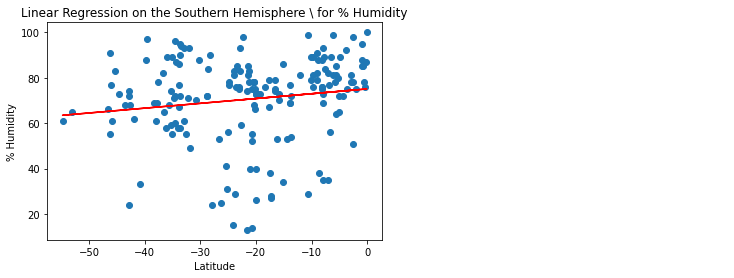

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(40,10))
                        

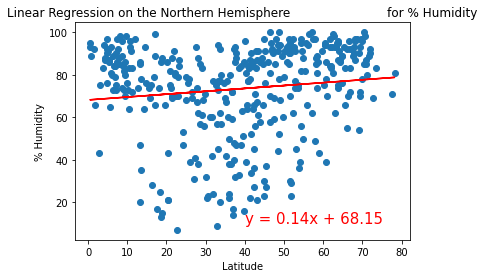

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

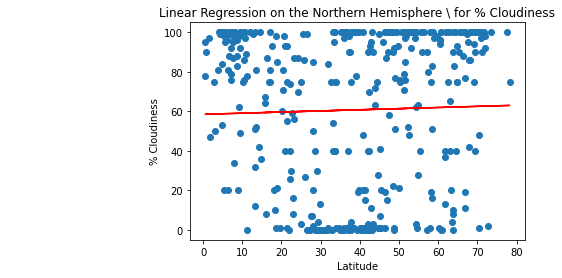

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))
#not sure why it won't show formula

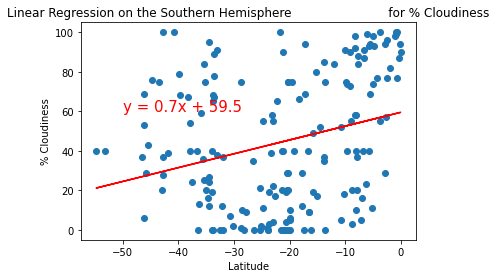

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

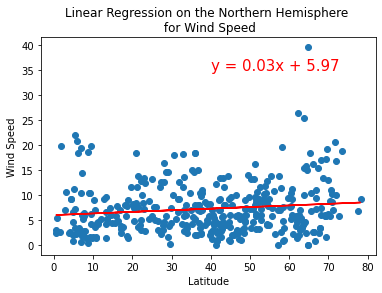

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

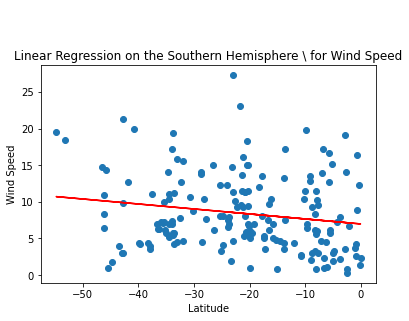

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-50,35))

In [46]:
## G Maps API
    # convert coordinates into locations on a map
    # create heatmaps based on density/weight of a feature
    # identify nearest hotels/restaurants to a given location
    # determine distance between two points

In [47]:
#basic heatmaps need lat/long of location + measurement value for each lat/long in an array

In [48]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Lorengau,82,PG,2021-09-25 22:14:25,75,-2.0226,147.2712,83.12,6.73
1,1,Cuyamel,67,HN,2021-09-25 22:16:13,74,15.6667,-88.2000,89.76,4.36
2,2,Hasaki,100,JP,2021-09-25 22:16:13,60,35.7333,140.8333,68.40,14.52
3,3,Punta Arenas,40,CL,2021-09-25 22:16:13,65,-53.1500,-70.9167,42.91,18.41
4,4,Albany,93,US,2021-09-25 22:11:49,71,42.6001,-73.9662,69.53,2.82


In [49]:
# data for mapping in gmaps is the number must be an integer or floating point decimal

In [50]:
#check data type to ensure above
city_data_df.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date           object
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [51]:
### Max Temperature Heatmap

In [99]:
# Configure gmaps to use your Google API key.
from config import g_maps_key
gmaps.configure(api_key=g_maps_key)

In [53]:
#FORMAT

# 1. Assign the locations to an array of latitude and longitude pairs.
#locations = [latitude, longitude]
# 2. Assign the weights variable to some values.
#temperatures = # an array of length equal to the locations array length
# 3. Assign the figure variable to the gmaps.figure() attribute.
#fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
#heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# 5. Add the heatmap layer.
#fig.add_layer(heatmap_layer)
# 6. Call the figure to plot the data.
#fig

In [100]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# gmaps doesn't plot negative numbers.  If less than 0 degress then InvalidWeightException
#will appear for original code heat_layer = gmaps.heatmap_layer(locations, weights=max_temp) up above

In [ ]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

In [66]:
# Get the maximum temperature./// doing this to remove negative numbers and creating a new list 
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0)) 
#using the max funtion to get largest value between temp and 0, so if temp is lesss than 0 then 0 
#will be added otherwise temp will be added tot he new list

In [ ]:
### Adjust Heatmap Zoom, Intensity, and Point

In [67]:
#adding a center + zoom level
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)

In [68]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)# Add the heatmap layer.
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [ ]:
# above: default for dissipation is True change to False. 
#add max_intensity to improve gradient variance
#added point_radius to encrease radius

In [69]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig 

Figure(layout=FigureLayout(height='420px'))

In [70]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [71]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds =  city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations,weights=clouds,
dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations,weights=wind,
dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
## Get the Criteria's

In [ ]:
#adding feature to allow user's to search for locations based on temp perferences

In [94]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

KeyboardInterrupt: Interrupted by user

In [74]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Lorengau,82,PG,2021-09-25 22:14:25,75,-2.0226,147.2712,83.12,6.73
1,1,Cuyamel,67,HN,2021-09-25 22:16:13,74,15.6667,-88.2000,89.76,4.36
5,5,Butaritari,50,KI,2021-09-25 22:13:29,75,3.0707,172.7902,82.98,10.51
6,6,Kikwit,74,CD,2021-09-25 22:16:14,65,-5.0410,18.8162,77.20,3.02
10,10,Marsh Harbour,99,BS,2021-09-25 22:16:16,69,26.5412,-77.0636,83.21,4.81
13,13,Manggar,94,ID,2021-09-25 22:16:17,81,-2.8833,108.2667,79.99,3.51
14,14,Bonthe,87,SL,2021-09-25 22:16:18,85,7.5264,-12.5050,78.62,6.38
18,18,Atuona,75,PF,2021-09-25 22:16:19,76,-9.8000,-139.0333,78.30,19.86
20,20,Alto Araguaia,94,BR,2021-09-25 22:16:20,27,-17.3147,-53.2153,85.10,5.39
23,23,Vaini,40,TO,2021-09-25 22:14:05,83,-21.2000,-175.2000,75.36,9.22


In [75]:
preferred_cities_df.count() # count can be used to find nulls because nullisn't a value so won't be counted

City_ID       161
City          161
Cloudiness    161
Country       161
Date          161
Humidity      161
Lat           161
Lng           161
Max Temp      161
Wind Speed    161
dtype: int64

In [76]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.// hotel name + lng added columns
#added from the loop of city_data that was loads forever
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Lorengau,PG,83.12,-2.0226,147.2712,
1,Cuyamel,HN,89.76,15.6667,-88.2000,
5,Butaritari,KI,82.98,3.0707,172.7902,
6,Kikwit,CD,77.20,-5.0410,18.8162,
10,Marsh Harbour,BS,83.21,26.5412,-77.0636,
13,Manggar,ID,79.99,-2.8833,108.2667,
14,Bonthe,SL,78.62,7.5264,-12.5050,
18,Atuona,PF,78.30,-9.8000,-139.0333,
20,Alto Araguaia,BR,85.10,-17.3147,-53.2153,
23,Vaini,TO,75.36,-21.2000,-175.2000,


In [77]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_maps_key,
    "location": "48.8566, 2.3522" }
# Use base URL to search for hotels in Paris.
base_url= "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEC2rhH4R9v2XTCjlx4ptAAbHgNZzs5VJ8oMs_N-Ksm2TC9sbWpsx8FI5WMSKztRW1cwJCc7iXk5RhEE0fhBCJIl8-UsRmbmCzLQIxNC873iecd709fy8r9_dPRodFpEUpz1UDcciiff2EOsNT_-h-gl-ypxe70yuf85D0hFCqeqJOSljRSFWqW3KRtKZDwGqpZf7EAn0MEzmYmDXi1m74HaKBGPLtDEVRiidmsmt0LG1GINIIM5dHREN_TZS0SSlHZXKyDid_gqYskBTt8E9po0q58J7QUjMGLoo3t8fBAZZMKuGoT9CsMS0kyrVKcpl6euAsGtYy9f3uTs6ngtuC2sRniuVmWIGw2k79QJQmPlQvZ0qp8XqH9FIOEpAuNcfdfX_XGtjrLri8aDlVPZH_4IEU5J7Y9M2lAJw47xA5eTaaOgPHvXZzpw',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [78]:
len(hotels["results"])

20

In [79]:
hotels["results"][0]["name"]

'Hôtel Duo'

In [86]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
  # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")
    
    

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [ ]:
### Create a Max Tem Heatmap from HoteLDF

In [92]:
# Add a heatmap of temperature for the vacation spots.//first step
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations,  info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#info_box_template = """
#<dl>
#<dt>Name</dt><dd>{column1}</dd>
#<dt>Another name</dt><dd>{column2}</dd>
#</dl>
#"""

In [91]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()] #will be added to heatmap code